# The 2024/25 Rosenheim Alzheimer's Detection Challenge (RAD-C)

Your team participates in an internal challenge mimicing the current PROCESS Signal Processing Challenge. You can read more about it here: https://processchallenge.github.io/

Your task is to classify the patients in the dataset as either having Alzheimer's or not and to predict the MMSE score of the patients using the speech and text samples provided to you.

For the two tasks, participants must generate their predictions using the `template.csv` file that will be release with the test set containing test IDs. (later, after 30.11.2024 )
To avoid confusion, please share your files in the format: 
RAD-C_classification_model1.csv, RAD-C_regression_model1.csv.
You can submit your predictions 3 times with your team's code once the submission system is open. (LINK WILL BE PROVIDED LATER) 
There will be an anonymized leaderboard for the classification and regression tasks.

### Classification: This task is aimed at identifying those with different cognitive impairments and dementia from healthy volunteers through the processing of their speech.
### Regression: This task is to predict the corresponding Mini Mental Status Examination (MMSE) score of speakers from their speech.

# Your task:
- Make teams of two and register them with the me.
- Train a model to classify the patients in the dataset as either having Alzheimer's, a mild cognitive impairment or if they are healthy controls.
- Train a regression model to predict the MMSE score of the subjects.
- Submit your predictions in the format mentioned above. You can submit up to three times
- choose your best model on the validation set result. The test set will be provided to you for predictions in the first week of December.
- The result of the team with the best classification and regression models will submitted to the actual challenge.
- Submissions to the internal TH-RO challenge (RAD-C) will be possible until the 31st of December 2024.
- Present your results in a 20 minutes presentation to the group that contains:
  - your approach
    - technical details
    - basics of the techniques used and the literature you based your approach on
    - e.g. you used ECAPA-TDNN embeddings, why and how do ECAPA-TDNN embeddings work (briefly!)?
  - how did you come up with the approach
    - why X not Z
    - how did your approach evolve, when did you pivot and why
    - what are the limitations of your approach
  - what worked and what didn't
  - your results and a discussion of the results

# Timetable
- 30.10.2024: Introduction to the challenge
- 06.11.2024: Report Teams of two, discussion of possible approaches 
- 29.11.2024: Test set release and release of the challenge baseline
- 06.12.2024: submission of test-set predictions (if you want to try submitting to the actual challenge, this gives a bonus submission to the internal challenge)
- 15.01.2025: internal submission deadline, discussion of the final **presentation** with the lecturer
- 22.01.2025: Final presentation of the results


# Hints!
- listen to the data
- maybe the data needs preprocessing
- try to visualize the data / look at the stats
- can the metadata help you in troubleshooting?
- get a feeling for the challenge by creating a baseline or trying to match the baseline using one of the easier methods you know from the lectures
- find a model that works well on the development set, only submit results for the test set that performed well on the development set
    

In [1]:
import pandas as pd
import librosa
df = pd.read_csv('./process/PROCESS-V1/dem-info.csv')

In [2]:
df.head()

Record-ID TrainOrDev Class  Gender Age  Converted-MMSE
0  Process-rec-001      train   MCI    male  62            25.0
1  Process-rec-002        dev   MCI    male  61            25.0
2  Process-rec-003      train   MCI  female  62            29.0
3  Process-rec-004        dev   MCI  female  67            29.0
4  Process-rec-005      train   MCI    male  65            27.0

In [3]:
# fix 66* string value in Age column
# df['Age'].value_counts()
from IPython.display import display, Audio
df['Class'].value_counts()
def load_process(path):
    df = pd.read_csv(f'{path}/dem-info.csv')
    # fix 66* string value in Age column
    df['Age'] = df['Age'].apply(lambda x: x.replace('66*', '66'))
    df['Age'] = df['Age'].astype(int)
    # get_file_names
    for ext in ["CTD", "PFT", 'SFT']:
        df[f'{ext}_wav'] = f'{path}/' + df['Record-ID'] + '/' + df['Record-ID'] + f'__{ext}.wav'
        df[f'{ext}_txt'] = f'{path}/' + df['Record-ID'] + '/' + df['Record-ID'] + f'__{ext}.txt'

    # fix 66* string value in Age column
    df_train = df.loc[df['TrainOrDev'] == 'train']
    df_dev = df.loc[df['TrainOrDev'] == 'dev']
    return df_train, df_dev

In [4]:
df_train, df_dev = load_process("./process/PROCESS-V1/")

- Semantic Fluency asks participants to respond to the task of “Please name as many animals as you can in a minute.” This is similar to the naming task in many cognition assessments, which primarily evaluate language abilities and naming skills to detect potential issues in language comprehension and expression.
- Phonemic Fluency asks participants to respond to the task of “Please say as many words beginning with the letter ‘P’ as you can. Any word beginning with ‘P’ except for names of people such as Peter, or countries such as Portugal.” The time limit for this is also a minute and this task is similar to the language tasks used in cognition assessments to test verbal fluency and executive functions related to language.
- Cookie Theft picture description. Figure 1 shows the picture of Cookie Theft which speakers are asked to describe. This approach is widely used to collect audio in dementia detection research. This type of audio is expected to reflect various cognitive functions of speakers, such as language comprehension and memory.
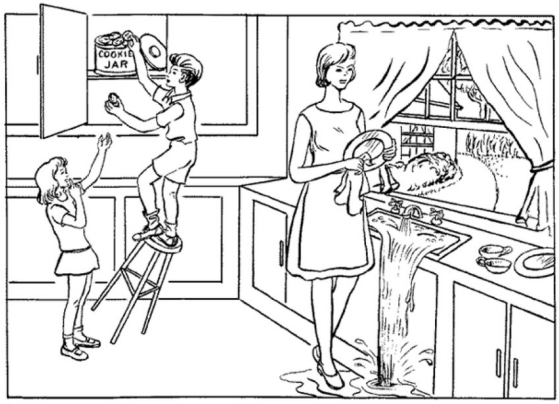

### The Corpus
The training and development sets consist of audio recordings and corresponding manual transcripts of each prompt for every speaker. For the classification task, we provide a diagnosis for each speaker (such as healthy volunteer, MCI and dementia), while for the regression task, we provide the MMSE score for each speaker.

**Important: for the test set, the transcripts and diagnoses are not available because providing manual transcription conflicts with the design principles of modern automated detection systems.**

In [13]:
a, rate = librosa.load(df_train.iloc[3]['CTD_wav'], sr=16000)
# df_train.iloc[3]
display(Audio(a, rate=rate))
a, rate = librosa.load(df_train.iloc[0]['PFT_wav'], sr=16000)
display(Audio(a, rate=rate))
a, rate = librosa.load(df_train.iloc[0]['SFT_wav'], sr=16000)
display(Audio(a, rate=rate))

In [12]:
df_train.iloc[3]

Record-ID                                           Process-rec-006
TrainOrDev                                                    train
Class                                                      Dementia
Gender                                                         male
Age                                                              83
Converted-MMSE                                                 26.0
CTD_wav           ./process/PROCESS-V1//Process-rec-006/Process-...
CTD_txt           ./process/PROCESS-V1//Process-rec-006/Process-...
PFT_wav           ./process/PROCESS-V1//Process-rec-006/Process-...
PFT_txt           ./process/PROCESS-V1//Process-rec-006/Process-...
SFT_wav           ./process/PROCESS-V1//Process-rec-006/Process-...
SFT_txt           ./process/PROCESS-V1//Process-rec-006/Process-...
Name: 5, dtype: object

<Axes: xlabel='Converted-MMSE', ylabel='Age'>

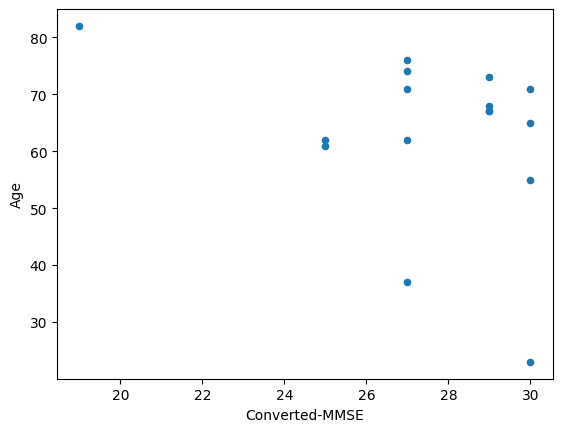

In [10]:

df_dev[['Age', 'Converted-MMSE']].plot.scatter(y='Age', x='Converted-MMSE')

In [11]:

df_train.describe()

Age  Converted-MMSE
count  117.000000       53.000000
mean    66.478632       27.320755
std     12.100583        2.375950
min     23.000000       19.000000
25%     63.000000       26.000000
50%     67.000000       28.000000
75%     73.000000       29.000000
max     94.000000       30.000000

In [12]:
df_train['Converted-MMSE'].describe()

count    53.000000
mean     27.320755
std       2.375950
min      19.000000
25%      26.000000
50%      28.000000
75%      29.000000
max      30.000000
Name: Converted-MMSE, dtype: float64

In [23]:
df_dev['Converted-MMSE'].describe()

count    16.000000
mean     27.500000
std       2.828427
min      19.000000
25%      27.000000
50%      28.000000
75%      29.250000
max      30.000000
Name: Converted-MMSE, dtype: float64

In [14]:
display(df_train['Class'].value_counts())
display(df_dev['Class'].value_counts())


Class
HC          61
MCI         44
Dementia    12
Name: count, dtype: int64

Class
HC          21
MCI         15
Dementia     4
Name: count, dtype: int64

In [15]:
import opensmile
import numpy as np
from tqdm import tqdm

smile = opensmile.Smile(
    feature_set=opensmile.FeatureSet.eGeMAPSv02, # few features
    feature_level=opensmile.FeatureLevel.Functionals,
)
compare = opensmile.Smile(
    feature_set=opensmile.FeatureSet.ComParE_2016, # many features, takes longer
    feature_level=opensmile.FeatureLevel.Functionals,
)
def extract_features(df, audio_file, feature_set='compare'):
    X, y = [], []
    for _, row in tqdm(df.iterrows()):
        y.append(row['Class'])
        X.append(
                {
                   'compare': compare.process_file(row[audio_file]),
                   'egmaps' : smile.process_file(row[audio_file])
                }[feature_set]
            )
    return np.array(X), np.array(y)

In [39]:
extract_data = False
if extract_data:
    for rec_type in ['CTD_wav', 'SFT_wav', 'PFT_wav']:
        print(f'Processing {rec_type} train')
        X_train_tmp, _ = extract_features(df_train, rec_type)
        df_train[f'{rec_type.split("_")[0]}_os_features'] = [x for x in X_train_tmp.squeeze()]
        print(f'Processing {rec_type} dev')
        X_dev_tmp, _ = extract_features(df_dev, rec_type)
        df_dev[f'{rec_type.split("_")[0]}_os_features'] = [x for x in X_dev_tmp.squeeze()]

Processing CTD_wav train


117it [03:02,  1.56s/it]


Processing CTD_wav dev


40it [01:00,  1.50s/it]


Processing SFT_wav train


117it [02:27,  1.26s/it]


Processing SFT_wav dev


40it [00:50,  1.26s/it]


Processing PFT_wav train


117it [02:24,  1.23s/it]


Processing PFT_wav dev


40it [00:48,  1.22s/it]


In [53]:
df_dev.head()

Record-ID TrainOrDev     Class  Gender  Age  Converted-MMSE  \
1   Process-rec-002        dev       MCI    male   61            25.0   
3   Process-rec-004        dev       MCI  female   67            29.0   
6   Process-rec-007        dev        HC    male   65             NaN   
7   Process-rec-008        dev       MCI  female   62            25.0   
15  Process-rec-016        dev  Dementia  female   66             NaN   

                                              CTD_wav  \
1   ./process/PROCESS-V1//Process-rec-002/Process-...   
3   ./process/PROCESS-V1//Process-rec-004/Process-...   
6   ./process/PROCESS-V1//Process-rec-007/Process-...   
7   ./process/PROCESS-V1//Process-rec-008/Process-...   
15  ./process/PROCESS-V1//Process-rec-016/Process-...   

                                              CTD_txt  \
1   ./process/PROCESS-V1//Process-rec-002/Process-...   
3   ./process/PROCESS-V1//Process-rec-004/Process-...   
6   ./process/PROCESS-V1//Process-rec-007/Process-...   
7   ./process/PROCESS-V1//Process-rec-008/Process-...   
15  ./process/PROCESS-V1//Process-rec-016/Process-...   

                                              PFT_wav  \
1   ./process/PROCESS-V1//Process-rec-002/Process-...   
3   ./process/PROCESS-V1//Process-rec-004/Process-...   
6   ./process/PROCESS-V1//Process-rec-007/Process-...   
7   ./process/PROCESS-V1//Process-rec-008/Process-...   
15  ./process/PROCESS-V1//Process-rec-016/Process-...   

                                              PFT_txt  \
1   ./process/PROCESS-V1//Process-rec-002/Process-...   
3   ./process/PROCESS-V1//Process-rec-004/Process-...   
6   ./process/PROCESS-V1//Process-rec-007/Process-...   
7   ./process/PROCESS-V1//Process-rec-008/Process-...   
15  ./process/PROCESS-V1//Process-rec-016/Process-...   

                                              SFT_wav  \
1   ./process/PROCESS-V1//Process-rec-002/Process-...   
3   ./process/PROCESS-V1//Process-rec-004/Process-...   
6   ./process/PROCESS-V1//Process-rec-007/Process-...   
7   ./process/PROCESS-V1//Process-rec-008/Process-...   
15  ./process/PROCESS-V1//Process-rec-016/Process-...   

                                              SFT_txt  \
1   ./process/PROCESS-V1//Process-rec-002/Process-...   
3   ./process/PROCESS-V1//Process-rec-004/Process-...   
6   ./process/PROCESS-V1//Process-rec-007/Process-...   
7   ./process/PROCESS-V1//Process-rec-008/Process-...   
15  ./process/PROCESS-V1//Process-rec-016/Process-...   

                                      CTD_os_features  \
1   [1.6012821, 0.081533246, 0.0, 0.05741674, 0.07...   
3   [2.540336, 0.4688779, 0.0021171488, 0.2079779,...   
6   [2.1869736, 0.007963751, 0.00096114236, 0.1506...   
7   [0.603604, 0.2952211, 0.59163314, 0.035482083,...   
15  [2.7547336, 0.30204147, 0.76579326, 0.10199823...   

                                      SFT_os_features  \
1   [1.4768381, 0.78881466, 0.21986644, 0.05413297...   
3   [1.8503226, 0.12585431, 0.025170863, 0.1607677...   
6   [3.3878567, 0.035364438, 0.0026564836, 0.04690...   
7   [0.59957355, 0.026280548, 0.30900568, 0.032750...   
15  [2.5508034, 0.3668275, 0.6641158, 0.044883437,...   

                                      PFT_os_features  
1   [1.5626563, 0.803005, 0.0, 0.058488622, 0.0603...  
3   [2.5816498, 0.74054956, 0.0053288927, 0.163913...  
6   [2.6881652, 0.013780508, 0.0024904532, 0.02954...  
7   [0.50066036, 0.06871124, 0.5634322, 0.03191737...  
15  [2.538983, 0.030368047, 0.1815481, 0.053698216...

In [16]:
import pandas as pd
save_data = False
if save_data:
    df_train.to_pickle('df_train_compare.pkl')
    df_dev.to_pickle('df_dev_compare.pkl')
else:
    df_train = pd.read_pickle('df_train_compare.pkl')
    df_dev = pd.read_pickle('df_dev_compare.pkl')

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, recall_score, precision_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
scaler = StandardScaler()

In [19]:
class_weight=df_train['Class'].value_counts(normalize=True).to_dict()
class_weight = {k: 1 - v for k, v in class_weight.items()}

In [26]:
df_train['CTD_os_features'][0].shape

(6373,)

In [20]:
# X_train.shape
rec_type_preds = {}
for rec_type in ['CTD', 'SFT', 'PFT']:
    X_train = df_train[f'{rec_type}_os_features'].to_list()
    y_train = df_train['Class'].values
    X_dev = df_dev[f'{rec_type}_os_features'].to_list()
    y_dev = df_dev['Class'].values
    # clf = SVC()
    clf = SVC(class_weight=class_weight)
    pca = PCA(n_components=50)
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_dev_scaled = scaler.transform(X_dev)
    pca.fit(X_train_scaled)
    X_train_scaled = pca.transform(X_train_scaled)
    X_dev_scaled = pca.transform(X_dev_scaled)
    clf.fit(X_train_scaled, y_train)
    y_preds = clf.predict(X_dev_scaled)
    rec_type_preds[rec_type] = y_preds


CTD classification report
              precision    recall  f1-score   support

    Dementia       0.00      0.00      0.00         4
          HC       0.64      0.67      0.65        21
         MCI       0.50      0.60      0.55        15

    accuracy                           0.57        40
   macro avg       0.38      0.42      0.40        40
weighted avg       0.52      0.57      0.55        40



/Users/bayerl/.local/share/virtualenvs/studies/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/bayerl/.local/share/virtualenvs/studies/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/bayerl/.local/share/virtualenvs/studies/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

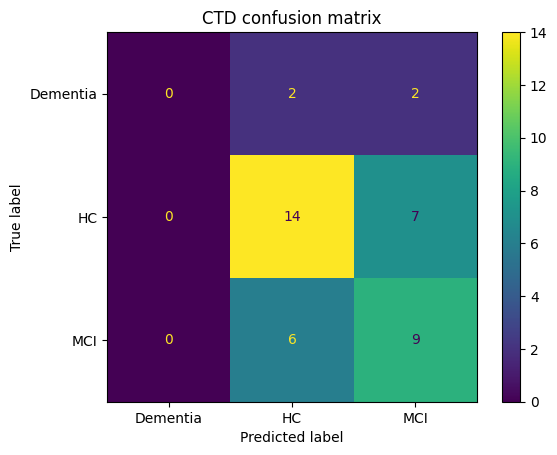

SFT classification report
              precision    recall  f1-score   support

    Dementia       0.00      0.00      0.00         4
          HC       0.58      0.52      0.55        21
         MCI       0.38      0.53      0.44        15

    accuracy                           0.47        40
   macro avg       0.32      0.35      0.33        40
weighted avg       0.45      0.47      0.46        40



/Users/bayerl/.local/share/virtualenvs/studies/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/bayerl/.local/share/virtualenvs/studies/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/bayerl/.local/share/virtualenvs/studies/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

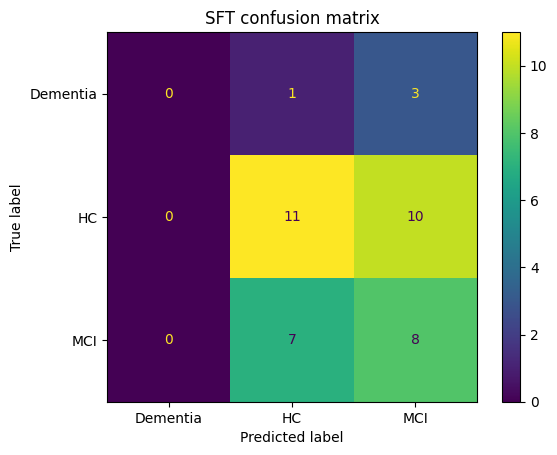

PFT classification report
              precision    recall  f1-score   support

    Dementia       0.00      0.00      0.00         4
          HC       0.63      0.57      0.60        21
         MCI       0.48      0.67      0.56        15

    accuracy                           0.55        40
   macro avg       0.37      0.41      0.39        40
weighted avg       0.51      0.55      0.52        40



/Users/bayerl/.local/share/virtualenvs/studies/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/bayerl/.local/share/virtualenvs/studies/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/bayerl/.local/share/virtualenvs/studies/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

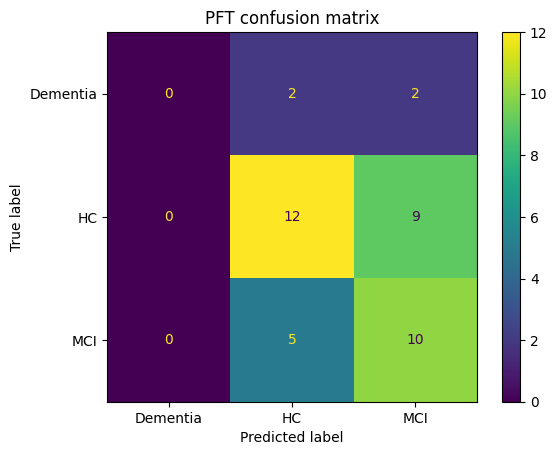

In [21]:
for rec_type in ['CTD', 'SFT', 'PFT']:
    print(f'{rec_type} classification report')
    print(classification_report(y_dev, rec_type_preds[rec_type]))
    cmd = ConfusionMatrixDisplay(confusion_matrix(y_dev, rec_type_preds[rec_type], labels=clf.classes_), display_labels=clf.classes_).plot()
    cmd.ax_.set_title(f'{rec_type} confusion matrix')
    plt.show()

In [27]:
confusion_matrix(y_dev, y_preds, labels = ['HC', 'MCI', 'Dementia'])

array([[19,  2,  0],
       [11,  4,  0],
       [ 3,  1,  0]])